In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize
from cs231n.data_utils import load_CIFAR10
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
def plot_images(images, n_cols=12):
    n_images = images.shape[0]
    n_rows = n_images // n_cols
    
    for r in range(n_rows):
        for c in range(n_cols):
            plt_idx = r * n_cols + c + 1
            plt.subplot(n_rows, n_cols, plt_idx)
            plt.imshow(images[r * n_cols + c].astype('uint8'))
            plt.axis('off')
    plt.show()

In [47]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

n_train = X_train.shape[0]

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


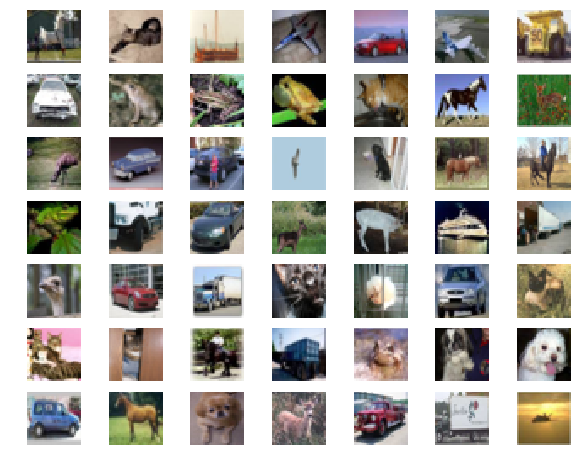

In [48]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
image_indices = np.random.randint(0, n_train, 7*7)
plot_images(X_train[image_indices], n_cols=7)

In [55]:
X_train_flat = X_train.reshape(n_train, -1)
X_mean = np.mean(X_train_flat, axis = 0)
X_train_flat -= X_mean # zero-center the data (important)
cov = np.dot(X_train_flat.T, X_train_flat) / n_train # get the data covariance matrix

U,S,V = np.linalg.svd(cov) # Columns of U are the eigenvectors

In [50]:
X_rot = np.dot(X_train_flat, U) # decorrelate the data

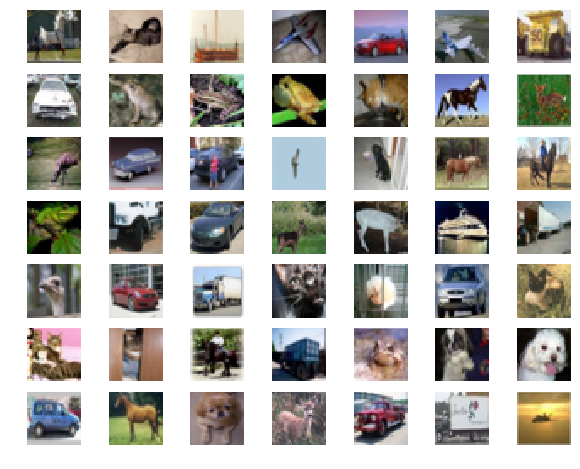

In [59]:
X = X_train_flat[image_indices]
n_eigens = 3072
X_rot_reduced = np.dot(X, U[:, :n_eigens])

images = np.dot(X_rot_reduced, U[:, :n_eigens].T)
images += X_mean
plot_images(images.reshape(49, 32, 32, 3), n_cols=7)

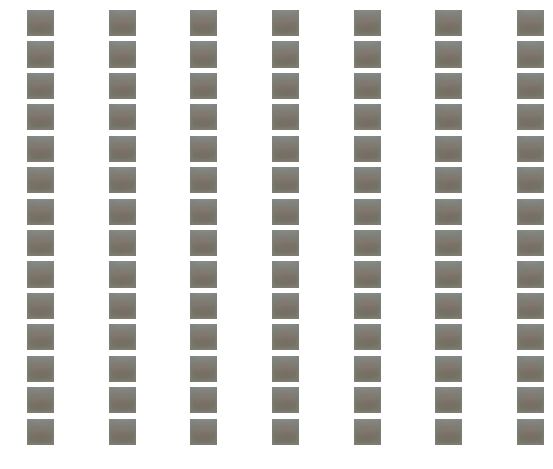

In [61]:
top_eigens = U[:, :100].T + X_mean  # 100x3072
plot_images(top_eigens.reshape(100, 32, 32, 3), n_cols=7)

In [52]:
# 